惊了，之前犯了那么大一个错误还实验报告还写的一股子劲。。之前那个上升到每个信号产生15个和样本匹配的好像拟合出的结果不太好看，
这里试试对这个序列本身采样看看。

In [1]:
process_pre = csvread('2018-10-28-13-21-8DataDemo.csv',1,1);
process_mid = csvread('2018-10-28-14-0-3DataDemo.csv',1,1);
process_after = csvread('2018-10-28-15-53-18DataDemo.csv',1,1);

process_10 = csvread('2018-10-28-14-44-59DataDemo_Sequence_Identy.csv',1,1);
process_20 = csvread('2018-10-28-15-58-24DataDemo_Sequence_Identy.csv',1,1);

input1 = 10 * idinput(63,'prbs');
input2 = 20 * idinput(63,'prbs');

In [3]:
yf = process_10(:,3) - mean(process_10(:,3));
uf = repelem(input1, 15);
uf = uf(1:size(y,1),:);

size(uf)
size(yf)


ans =

   944     1


ans =

   944     1




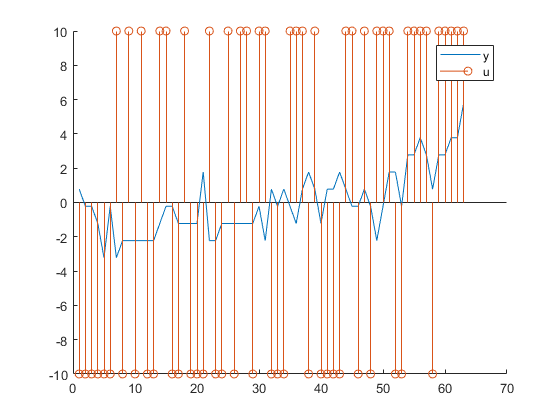

In [18]:
u = uf(1:15:944);
y = yf(1:15:944);
hold on
plot(y)
stem(u)
legend('y','u')
hold off

In [19]:
rho = 0.99;

In [20]:
clear aic_arr

for n_a = 1:10
    for n_b = 1:10
        for n_c = 1:10
            %y = data(:,1,di);
            %u = data(:,2,di);
            [theta, P, xi] = rels(y,u,n_a,n_b,n_c,rho);
            %aic = get_aic(xi, n_a+n_b+n_c+1);
            aic = get_aic(refine_xi(y, u, n_a, n_b, n_c, d, 0.99, theta),n_a+n_b+n_c+1-d);
            aic_arr(n_a,n_b,n_c) = aic;
        end
    end
end

[min_aic,min_a,min_b,min_c] = min3d(aic_arr)



min_aic =

  104.7648


min_a =

     4


min_b =

     7


min_c =

     1




In [21]:
aic_arr


aic_arr(:,:,1) =

  109.5361  109.0719  115.2967  117.9453  115.3385  107.9484  105.8933  107.4524  109.8750  109.6717
  113.2786  113.8486  117.0054  119.4384  116.7257  109.4113  106.7152  108.7761  110.4254  110.6304
  115.9049  116.5081  116.1688  122.1059  118.0690  111.2021  106.9420  108.6331  110.3777  112.9432
  125.8917  120.6075  124.1987  126.4883  117.4273  117.3020  104.7648  107.3451  109.8211  111.3150
  113.2003  114.1755  115.1849  117.2286  118.8791  115.8555  105.9961  107.5839  109.4500  112.8204
  115.3864  123.1398  118.8313  119.6596  119.0361  116.4384  108.5976  109.0651  111.3020  113.3636
  114.5303  115.4932  116.3185  118.8554  120.3429  117.3470  111.1570  111.3281  113.2562  115.0362
  116.7086  121.7509  120.4819  126.1117  126.3799  120.6437  114.2683  121.5124  121.4846  123.8026
  116.2190  119.8453  118.3586  121.8081  122.8739  120.9987  110.2771  112.9078  116.4988  120.4702
  117.3686  121.3627  119.8558  125.5808  125.4052  122.9820  109.6409  

In [22]:
[theta, P, xi] = rels(y,u,4,7,1,rho);
theta


theta =

   -0.3409
   -0.0596
   -0.0493
   -0.2446
    0.0255
    0.0168
    0.0334
    0.0256
    0.0169
    0.0294
    0.0433
    0.0559
   -0.2218




看上去不错，不过这不就代表它对应了采用完整周期的5\*10个点之前有关了么。。

In [23]:
min_aic = inf;


for n_a = 1:10
    for n_b = 0:10
        for n_c = 0:10
            for d = 0:n_b
                %y = data(:,1,di);
                %u = data(:,2,di);
                [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);
                %aic = get_aic(xi, n_a+n_b+n_c+1-d);
                aic = get_aic(refine_xi(y, u, n_a, n_b, n_c, d, 0.99, theta),n_a+n_b+n_c+1-d);
                if(aic < min_aic)
                    min_aic = aic;
                    min_a = n_a;
                    min_b = n_b;
                    min_c = n_c;
                    min_d = d;
                end
                %aic_arr(n_a,n_b,n_c,d+1) = aic;
            end
        end
    end
end


In [24]:
[min_a,min_b,min_c,min_d]


ans =

     4     7     0     6





ans =

     6    63


theta =

   -0.3499
   -0.1170
   -0.1471
   -0.2818
    0.0342
    0.0524


aic =

  103.3752

> In legend>set_children_and_strings (line 674)
  In legend>make_legend (line 346)
  In legend (line 294)
  In plot_trace (line 9)



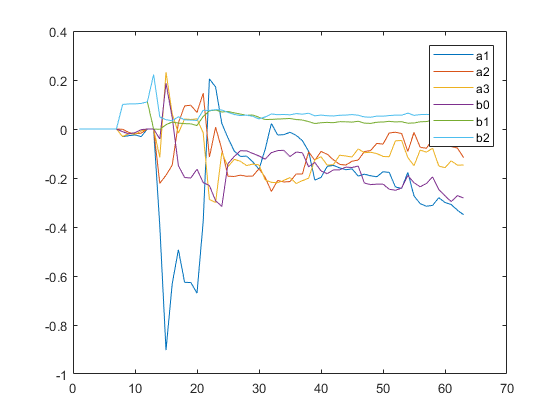

In [25]:
n_a = min_a;
n_b = min_b;
n_c = min_c;
d = min_d;

clear thetas

[theta, P, xi, thetas] = relsd(y, u, n_a, n_b, n_c, d, 0.99);
size(thetas)
theta
aic = get_aic(xi, n_a+n_b+n_c+1-d)

plot_trace(thetas, 1:length(theta), ["a1","a2","a3","b0","b1","b2","c1","c2","c3"])
